In [20]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dependencies
import time
todaysdate = time.strftime("%m/%d/%Y")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [44]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List for dictionaries of results
results_list = []
results_df = pd.DataFrame(columns=['User','Compound','Positive Score','Neutral Score','Negative Score','Tweets_Ago'])
oldest_tweet = None
counter = 1


# Loop through each user
for user in target_user:
   
    counter = 0
    
    for x in range(5):
        public_tweets = api.user_timeline(user, 
                               max_id=oldest_tweet)
   
        # Loop through all tweets
        for tweet in public_tweets:
            # Move to the next tweet
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            oldest_tweet = tweet['id'] - 1

    
            results_df = results_df.append({'User': user,'Compound': compound, 'Positive Score': pos, 
                           'Neutral Score': neu, 'Negative Score': neg,'Tweets_Ago': tweets_ago}, ignore_index=True)  
            counter += 1
results_df

,User,Compound,Positive Score,Neutral Score,Negative Score,Tweets_Ago
0,@BBCWorld,-0.1027,0.250,0.463,0.287,0
1,@BBCWorld,-0.3400,0.000,0.833,0.167,1
2,@BBCWorld,0.4019,0.252,0.748,0.000,2
3,@BBCWorld,0.0000,0.000,1.000,0.000,3
4,@BBCWorld,0.1655,0.142,0.858,0.000,4
5,@BBCWorld,-0.6597,0.000,0.614,0.386,5
6,@BBCWorld,-0.8316,0.000,0.683,0.317,6
7,@BBCWorld,0.0000,0.000,1.000,0.000,7
8,@BBCWorld,0.0000,0.000,1.000,0.000,8
9,@BBCWorld,-0.8316,0.000,0.506,0.494,9


In [18]:
nyTimesResults_df = results_df[results_df.User=='@nytimes']
FoxNewsResults_df = results_df[results_df.User=='@FoxNews']
BBCNewsResults_df = results_df[results_df.User=='@BBCWorld']
CBSNewsResults_df = results_df[results_df.User=='@CBSNews']
cnnNewsResults_df = results_df[results_df.User=='@CNN']


,User,Compound,Positive Score,Neutral Score,Negative Score,Tweets_Ago
400,@nytimes,0.3818,0.217,0.663,0.120,0
401,@nytimes,-0.8271,0.000,0.648,0.352,1
402,@nytimes,-0.2023,0.141,0.677,0.182,2
403,@nytimes,0.0000,0.000,1.000,0.000,3
404,@nytimes,0.7003,0.225,0.775,0.000,4
405,@nytimes,-0.7096,0.000,0.763,0.237,5
406,@nytimes,0.0000,0.000,1.000,0.000,6
407,@nytimes,0.0000,0.000,1.000,0.000,7
408,@nytimes,0.4215,0.167,0.833,0.000,8
409,@nytimes,0.4404,0.112,0.888,0.000,9


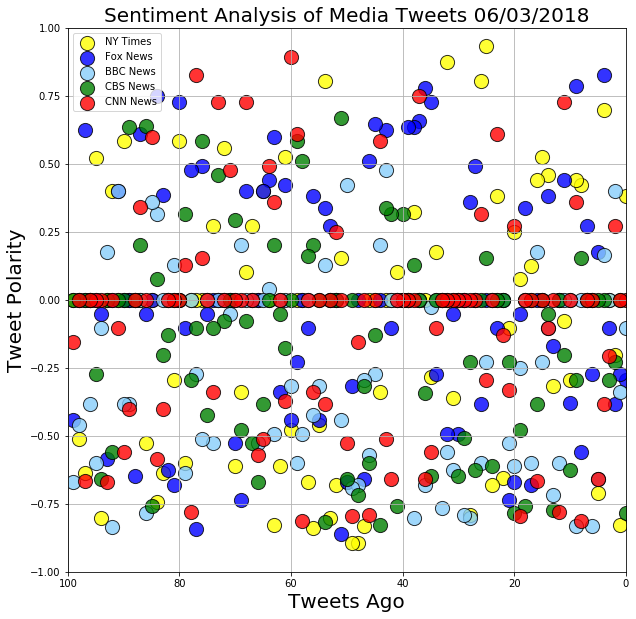

In [45]:
plt.figure(figsize=(10,10))   

plt.scatter(nyTimesResults_df.Tweets_Ago, nyTimesResults_df.Compound, c="yellow", 
            edgecolor="black", linewidth=1, s = 200,
            marker="o", alpha=0.8, label="NY Times")
plt.scatter(FoxNewsResults_df.Tweets_Ago, FoxNewsResults_df.Compound, c="blue", 
            edgecolor="black", linewidth=1, s = 200,
            marker="o", alpha=0.8, label="Fox News")
plt.scatter(BBCNewsResults_df.Tweets_Ago, BBCNewsResults_df.Compound, c="lightskyblue", 
            edgecolor="black", linewidth=1, s = 200,
            marker="o", alpha=0.8, label="BBC News")
plt.scatter(CBSNewsResults_df.Tweets_Ago, CBSNewsResults_df.Compound, c="green", 
            edgecolor="black", linewidth=1, s = 200,
            marker="o", alpha=0.8, label="CBS News")
plt.scatter(cnnNewsResults_df.Tweets_Ago, cnnNewsResults_df.Compound, c="red", 
            edgecolor="black", linewidth=1, s = 200,
            marker="o", alpha=0.8, label="CNN News")

plt.legend(loc="best")
plt.title('Sentiment Analysis of Media Tweets' " " + todaysdate, fontsize=20)
plt.xlabel('Tweets Ago',fontsize=20)
plt.ylabel('Tweet Polarity', fontsize=20)
plt.xlim(100,0)
plt.ylim(-1,1)
plt.grid()
plt.show()

In [58]:
final_df = pd.DataFrame(results_df.groupby(['User'])['Compound'].mean())
final_df = final_df.reset_index()
final_df

,User,Compound
0,@BBCWorld,-0.213932
1,@CBSNews,-0.133006
2,@CNN,-0.070652
3,@FoxNews,0.011677
4,@nytimes,-0.073919


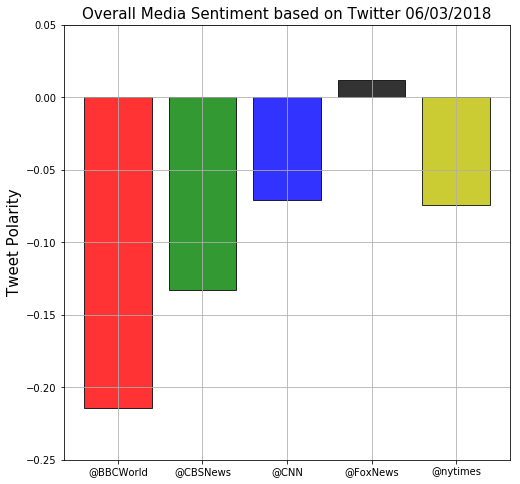

In [90]:
my_colors = 'rgbkymc'
plt.figure(figsize=(8,8))   

plt.bar(final_df.User, final_df.Compound, alpha=0.8, edgecolor='black',color=my_colors)

plt.legend(loc="best")
plt.title('Overall Media Sentiment based on Twitter' " " + todaysdate, fontsize=15)
plt.ylabel('Tweet Polarity', fontsize=15)
plt.ylim(-.25,.05)

plt.ylim(-.25,.05)
plt.grid()
plt.show()